## Pymaceuticals Instructions

While your data companions rushed off to jobs in finance and government, you remained adamant that science was the way for you. Staying true to your mission, you've since joined Pymaceuticals Inc., a burgeoning pharmaceutical company based out of San Diego, CA. Pymaceuticals specializes in drug-based, anti-cancer pharmaceuticals. In their most recent efforts, they've since begun screening for potential treatments to squamous cell carcinoma (SCC), a commonly occurring form of skin cancer.

As their Chief Data Analyst, you've been given access to the complete data from their most recent animal study. In this study, 250 mice were treated through a variety of drug regimes over the course of 45 days. Their physiological responses were then monitored over the course of that time. Your objective is to analyze the data to show how four treatments (Capomulin, Infubinol, Ketapril, and Placebo) compare.

To do this you are tasked with:

* Creating a scatter plot that shows how the tumor volume changes over time for each treatment.
* Creating a scatter plot that shows how the number of [metastatic](https://en.wikipedia.org/wiki/Metastasis) (cancer spreading) sites changes over time for each treatment.
* Creating a scatter plot that shows the number of mice still alive through the course of treatment (Survival Rate)
* Creating a bar graph that compares the total % tumor volume change for each drug across the full 45 days.
* Include 3 observations about the results of the study. Use the visualizations you generated from the study data as the basis for your observations.

In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "../data/mouse_drug_data.csv"
clinical_trial_data_to_load = "../data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_df = pd.read_csv(mouse_drug_data_to_load)
clinical_df = pd.read_csv(clinical_trial_data_to_load)

# Combine the data into a single dataset
merged_df = pd.merge(clinical_df, mouse_df,on="Mouse ID",how="left")

# Display the data table for preview
merged_df.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.0,0,Capomulin
1,f932,0,45.0,0,Ketapril
2,g107,0,45.0,0,Ketapril
3,a457,0,45.0,0,Ketapril
4,c819,0,45.0,0,Ketapril


## Tumor Response to Treatment

In [2]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
grouped_df = merged_df.groupby(["Drug","Timepoint"])
avg_tumor_volume = grouped_df["Tumor Volume (mm3)"].mean()

# Convert to DataFrame
avg_tumor_df = pd.DataFrame(avg_tumor_volume)

# Preview DataFrame
avg_tumor_df.head()

Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                   45.000000
          5                   44.266086
          10                  43.084291
          15                  42.064317
          20                  40.716325

In [3]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
tumor_standard_errors = grouped_df["Tumor Volume (mm3)"].sem()

# Convert to DataFrame
tumor_standard_errors_df = pd.DataFrame(tumor_standard_errors)

# Preview DataFrame
tumor_standard_errors_df.head()

Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                    0.000000
          5                    0.448593
          10                   0.702684
          15                   0.838617
          20                   0.909731

In [4]:
# Minor Data Munging to Re-Format the Data Frames
tumor_formatted = avg_tumor_df.pivot_table(index="Timepoint",columns="Drug",values="Tumor Volume (mm3)")

# Preview that Reformatting worked
tumor_formatted.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


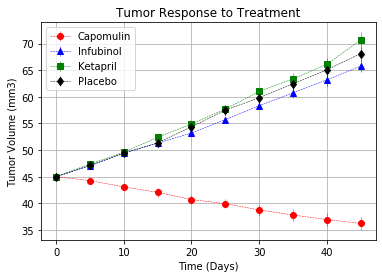

In [5]:
# Generate the Plot (with Error Bars)
fig, ax = plt.subplots()

x_axis = tumor_formatted.index
y_axis = tumor_formatted
errors = tumor_standard_errors

Capomulin = plt.errorbar(x_axis, y_axis["Capomulin"],yerr=errors["Capomulin"], 
                         label="Capomulin", marker="o", color="red", ls="dashed", linewidth=0.5)

Infubinol = plt.errorbar(x_axis, y_axis["Infubinol"], yerr=errors["Infubinol"],
                         label="Infubinol", marker="^", color="blue", ls="dashed", linewidth=0.5)

Ketapril = plt.errorbar(x_axis, y_axis["Ketapril"], yerr=errors["Ketapril"],
                         label="Ketapril", marker="s", color="green", ls="dashed", linewidth=0.5)

Placebo = plt.errorbar(x_axis, y_axis["Placebo"], yerr=errors["Placebo"],
                         label="Placebo", marker="d", color="black", ls="dashed", linewidth=0.5)
# Format 
plt.grid()
plt.title("Tumor Response to Treatment")
plt.xlabel("Time (Days)")
plt.ylabel("Tumor Volume (mm3)")
plt.legend(loc="upper left")

# Save the Figure
plt.savefig("01_Tumor_Response_to_Treatment.png")

In [6]:
# Show the Figure
plt.show()


## Metastatic Response to Treatment


In [7]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
grouped_met_site = merged_df.groupby(["Drug","Timepoint"])
avg_met_site = grouped_met_site["Metastatic Sites"].mean()

# Convert to DataFrame
avg_met_df = pd.DataFrame(avg_met_site)

# Preview DataFrame
avg_met_df.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

In [8]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
met_site_errors = grouped_met_site["Metastatic Sites"].sem()

# Convert to DataFrame
met_site_errors_df = pd.DataFrame(met_site_errors)

# Preview DataFrame
met_site_errors_df.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621

In [9]:
# Minor Data Munging to Re-Format the Data Frames
met_site_formatted = avg_met_df.pivot_table(index="Timepoint",columns="Drug",values="Metastatic Sites")

# Preview that Reformatting worked
met_site_formatted.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


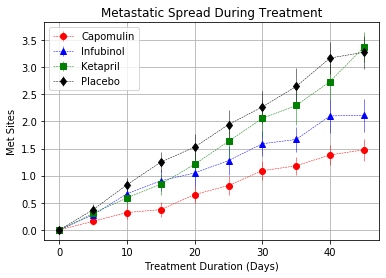

In [10]:
# Generate the Plot (with Error Bars)

fig, ax = plt.subplots()

x_axis = met_site_formatted.index
y_axis = met_site_formatted
errors = met_site_errors

Capomulin = plt.errorbar(x_axis, y_axis["Capomulin"],yerr=errors["Capomulin"], 
                         label="Capomulin", marker="o", color="red", ls="dashed", linewidth=0.5)

Infubinol = plt.errorbar(x_axis, y_axis["Infubinol"], yerr=errors["Infubinol"],
                         label="Infubinol", marker="^", color="blue", ls="dashed", linewidth=0.5)

Ketapril = plt.errorbar(x_axis, y_axis["Ketapril"], yerr=errors["Ketapril"],
                         label="Ketapril", marker="s", color="green", ls="dashed", linewidth=0.5)

Placebo = plt.errorbar(x_axis, y_axis["Placebo"], yerr=errors["Placebo"],
                         label="Placebo", marker="d", color="black", ls="dashed", linewidth=0.5)
# Format 
plt.grid()
plt.title("Metastatic Spread During Treatment")
plt.xlabel("Treatment Duration (Days)")
plt.ylabel("Met Sites")
plt.legend(loc="upper left")


# Save the Figure
plt.savefig("02_Metastatic_Spread_During_Treatment.png")

# Show the Figure
plt.show()

## Survival Rates

In [11]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)

mouse_count = grouped_df["Mouse ID"].count()

# Convert to DataFrame

mouse_count_df = pd.DataFrame(mouse_count)

mouse_count_df = mouse_count_df.rename(columns = {"Mouse ID":"Mouse Count"})


# Preview DataFrame

mouse_count_df.head()

Mouse Count
Drug      Timepoint             
Capomulin 0                   25
          5                   25
          10                  25
          15                  24
          20                  23

In [12]:
# Minor Data Munging to Re-Format the Data Frames
mouse_count_formatted = mouse_count_df.pivot_table(index="Timepoint",columns="Drug",values="Mouse Count")

# Preview that Reformatting worked
mouse_count_formatted.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17


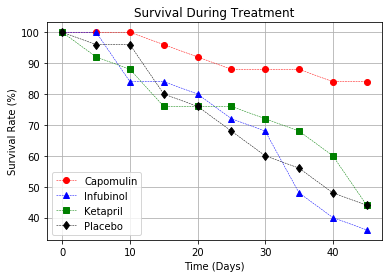

In [13]:
# Generate the Plot (Accounting for percentages)

x_axis = mouse_count_formatted.index
y_axis = mouse_count_formatted

Capomulin = plt.errorbar(x_axis, (y_axis["Capomulin"]/25*100),
                label="Capomulin", marker="o", color="red", ls="dashed", linewidth=0.5)

Infubinol = plt.errorbar(x_axis,(y_axis["Infubinol"]/25*100),
                 label="Infubinol", marker="^", color="blue", ls="dashed", linewidth=0.5)

Ketapril = plt.errorbar(x_axis,(y_axis["Ketapril"]/25*100),
                label="Ketapril", marker="s", color="green", ls="dashed", linewidth=0.5)

Placebo = plt.errorbar(x_axis,(y_axis["Placebo"]/25*100),
               label="Placebo", marker="d", color="black", ls="dashed", linewidth=0.5)
# Format 
plt.grid()
plt.title("Survival During Treatment")
plt.xlabel("Time (Days)")
plt.ylabel("Survival Rate (%)")
plt.legend(loc="bottom left")


# Save the Figure
plt.savefig("03_Survival_During_Treatment.png")

                
# Show the Figure
plt.show()

## Summary Bar Graph

In [14]:
# Calculate the percent changes for each drug
percentage_change = (tumor_formatted.iloc[-1]/(tumor_formatted.iloc[0])-1)*100

# Display the data to confirm
percentage_change

Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

In [15]:
# Store all Relevant Percent Changes into a Tuple


# Splice the data between passing and failing drugs


# Orient widths. Add labels, tick marks, etc. 


# Use functions to label the percentages of changes


# Call functions to implement the function calls


# Save the Figure


# Show the Figure
fig.show()